In [38]:
import numpy as np 
import pandas as pd
import os
import seaborn as sns
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [28]:
data = pd.read_csv('../nlp-labs/tobacco-lab/data/Tobacco3482.csv')
data.head(10)

,img_path,label
0,Advertisement/0000136188.jpg,Advertisement
1,Advertisement/0000435350.jpg,Advertisement
2,Advertisement/0000556056.jpg,Advertisement
3,Advertisement/0030048095.jpg,Advertisement
4,Advertisement/0030048989.jpg,Advertisement
5,Advertisement/0030049569.jpg,Advertisement
6,Advertisement/03496270.jpg,Advertisement
7,Advertisement/03567810.jpg,Advertisement
8,Advertisement/03722789.jpg,Advertisement
9,Advertisement/04102204.jpg,Advertisement


TypeError: set_xticklabels() missing 1 required positional argument: 'labels'

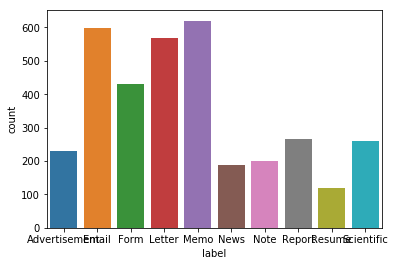

In [30]:
g = sns.countplot(data['label'],orient='h')
g.set_xticklabels(rotation=30)

In [35]:
list_files = []
for root, dirs, files in os.walk("./data", topdown=False):
    for name in files:
        if ".txt" in os.path.join(root, name) :
            list_files.append(os.path.join(root, name))

list_text = []
for file in list_files:
    file_object = open(file,'r')
    list_text.append(file_object.read())
    

In [33]:
dict_data = {}
for i in range(len(data['img_path'])):
    dict_data['../nlp-labs/tobacco-lab/data/'+data['img_path'][i].replace('jpg','txt')] = data['label'][i] 
X = []
y = []
for i in dict_data:
    file_object = open(i,"r")
    X.append(file_object.read())
    file_object.close()
    y.append(dict_data[i])

In [41]:

X_train, X_test,y_train,  y_test = train_test_split(X,y, test_size=0.2)
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size = 0.25)

In [42]:

# On vectorize nos tweets
vectorizer = CountVectorizer(max_features=2000)
vectorizer.fit(X_train)
X_train_counts = vectorizer.transform(X_train)
X_test_counts = vectorizer.transform(X_test)
X_dev_counts = vectorizer.transform(X_dev)

# On entraine nos Naives Bayes
model = MultinomialNB()
model.fit(X_train_counts,y_train)

y_pred_train = model.predict(X_train_counts)
y_pred_dev = model.predict(X_dev_counts)
y_pred_test = model.predict(X_test_counts)

print("Evalution (Phase de train) : ",accuracy_score(y_train,y_pred_train))
print("Evalution (Phase de dev) : ",accuracy_score(y_dev,y_pred_dev))
print("Evalution (Phase de test) : ",accuracy_score(y_test,y_pred_test),"\n")


print(classification_report(y_test,y_pred_test))
print(confusion_matrix(y_test,y_pred_test))


Evalution (Phase de train) :  0.8256704980842912
Evalution (Phase de dev) :  0.7288378766140603
Evalution (Phase de test) :  0.733142037302726 

               precision    recall  f1-score   support

Advertisement       0.67      0.64      0.65        53
        Email       0.87      0.92      0.89       114
         Form       0.71      0.74      0.72        91
       Letter       0.69      0.80      0.74       109
         Memo       0.80      0.72      0.75       137
         News       0.79      0.79      0.79        39
         Note       0.33      0.28      0.30        36
       Report       0.59      0.51      0.55        47
       Resume       0.95      1.00      0.97        18
   Scientific       0.71      0.70      0.70        53

  avg / total       0.73      0.73      0.73       697

[[ 34   3   1   2   3   3   7   0   0   0]
 [  0 105   0   4   3   1   0   1   0   0]
 [  6   1  67   5   3   0   7   1   0   1]
 [  0   2   2  87   8   1   0   6   0   3]
 [  2   2   7  17  9

# Commentaires 

Pas de soucis pour retrouver les CVs, ça il y arrive bien. 